In [1]:
import Parser, Deriver, Interpreter, Analyser2, SelfOrg
import numpy as np
import math

In [2]:
modelName = 'dereffye'

In [3]:
# Have to generate manually as we want points to be same for render and stats.
# We also want to be able to access some inner stuff for plotting

In [4]:
Specification   = Parser.parse('Specifications/'+modelName+'.txt', {})

In [5]:
n               = Specification['depth']
axiom           = Specification['axiom']
tree            = [axiom]
tree            = Deriver.derive(tree,n)

In [6]:
scale = 1

In [7]:
points = []

if Specification['self_org'] == False:

    # DERIVE
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    tree            = Deriver.derive(tree,n)

    # INTERPRET
    points, scale   = Interpreter.interpret(tree, True, return_scale=True)

else:

    # DERIVE AND INTERPRET TOGETHER
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    num_voxels      = Specification['num_voxels']
    shadow_height   = Specification['shadow_height']
    shadow_width    = Specification['shadow_width']
    decrement_close = Specification['dec_close']
    decrement_far   = Specification['dec_far']

    for i in range(0,n):
        tree = Deriver.derive(tree,1)
        points, scale = Interpreter.interpret(tree, True, return_scale = True)
        voxels          = SelfOrg.calc_light(points,
                                             num_voxels,
                                             shadow_height,
                                             shadow_width,
                                             decrement_close,
                                             decrement_far)
        SelfOrg.update_cells(tree, voxels, scale)
        print("Interpreted for the "+str(i+1)+"th time.")

In [8]:
# So we can view what we visualised
print("writing to file...")
with open("data.dat", mode="w") as f:
    f.write(str(len(points))+"\n")
    for p in points:
        x,y,z,r,a,b,c,d,l = p
        x /= scale
        y /= scale
        y -= 0.5
        z /= scale
        r /= scale
        line = [x,y,z,r,l]
        for feature in line:
            f.write(str(feature)+"\t")
        f.write("\n")
print("done writing.")

writing to file...
done writing.


In [9]:
points[0]

(0, 0, 0, 2.0, 0.0, 270.0, 0.0, 13.021793595082665, 0.0)

In [16]:
points[1]

(-9.34499642137705e-17,
 19.551651151857296,
 2.460960161778848,
 0.9799999999999999,
 20.650326347936314,
 90.0,
 20.650326347936314,
 6.978206404917336,
 0.0)

In [17]:
points[2]
full_points = points
full_points = np.array(points)

In [18]:
points = points[2:]

In [19]:
metrics         = Analyser2.analyse(points)

In [20]:
vertices        = np.array(points)

In [21]:
for (k,v) in metrics.items():
    print(k, ':', v)

parentAngle_mean : 35.18778583000937
parentAngle_variance : 17.681788292293778
length_mean : 1.4015303555212384
length_variance : 0.9107808108793118
verticalOrientation_mean : 58.57481769846238
verticalOrientation_variance : 32.027575818152705
horizontalOrientation_mean : 184.28066815849115
horizontalOrientation_variance : 112.05602343638282
q1_xyz : (4.852205794800931, 16.347088156454785, 11.974180450042635)
q2_xyz : (56.389373562856676, 28.26895196223074, 68.86129240942225)
q3_xyz : (49.61762441234599, 30.814989738114832, 49.2436508479638)
xyz : (59.300072609031055, 75.19089091763357, 68.86129240942225)
trunk_length : 13.021793595082665
totalBiomass : 294.3742140983796


In [22]:
math.degrees(metrics['parentAngle_mean'])

2016.1116184697792

In [23]:
vertices[:,5].mean()

185.19818294973513

In [24]:
import matplotlib.pyplot as plt

In [25]:
#Fed up of accessing via numerical values
# Format of points is:
# 0--1--2--3--4--5--6--7--8
# x  y  z  r  vA hA pA l--leaf
keys = {
    'x': 0,
    'y': 1,
    'z': 2,
    'radius': 3,
    'vertical orientation': 4,
    'horizontal orientation': 5,
    'parent angle': 6,
    'length': 7,
    'leaf': 8
}

(array([2046.,    0.,   14.,   84.,   80.,   56.,   46.,   62.,   48.,
          60.,   56.,   72.,   62.,   60.,   52.,   64.,   60.,   62.,
          58.,   54.,   44.,   60.,   56.,   56.,   46.,   66.,   62.,
          60.,   78.,   74.,   88.,   64.,   58.,   68.,   58.,   56.]),
 array([ 0.        ,  1.80390134,  3.60780269,  5.41170403,  7.21560538,
         9.01950672, 10.82340807, 12.62730941, 14.43121076, 16.2351121 ,
        18.03901345, 19.84291479, 21.64681614, 23.45071748, 25.25461883,
        27.05852017, 28.86242152, 30.66632286, 32.47022421, 34.27412555,
        36.0780269 , 37.88192824, 39.68582959, 41.48973093, 43.29363227,
        45.09753362, 46.90143496, 48.70533631, 50.50923765, 52.313139  ,
        54.11704034, 55.92094169, 57.72484303, 59.52874438, 61.33264572,
        63.13654707, 64.94044841]),
 <a list of 36 Patch objects>)

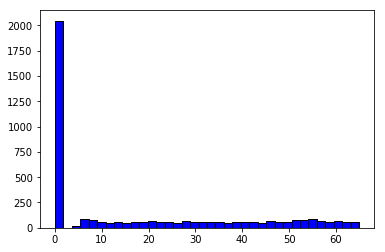

In [26]:
plt.hist(vertices[:,keys['parent angle']], color='blue', edgecolor='black', bins=36)

In [27]:
max_height = np.max(vertices[:,keys['y']])

In [28]:
lower_third  = full_points[full_points[:,keys['y']] < max_height/3]
middle_third = full_points[full_points[:,keys['y']] < 2*max_height/3]
middle_third = middle_third[middle_third[:,keys['y']] > max_height/3]
upper_third = full_points[full_points[:,keys['y']] > 2*max_height/3]

In [29]:
points[0]

(-9.34499642137705e-17,
 19.551651151857296,
 2.460960161778848,
 0.9799999999999999,
 13.712478809567388,
 332.74705758545747,
 29.44856706513161,
 4.462092264085245,
 0.0)

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
         0.,  3.,  0.,  9.,  8.,  1.,  6.,  6., 12.,  4.]),
 array([13.0217936 , 13.46167017, 13.90154675, 14.34142332, 14.7812999 ,
        15.22117647, 15.66105305, 16.10092963, 16.5408062 , 16.98068278,
        17.42055935, 17.86043593, 18.3003125 , 18.74018908, 19.18006566,
        19.61994223, 20.05981881, 20.49969538, 20.93957196, 21.37944854,
        21.81932511, 22.25920169, 22.69907826, 23.13895484, 23.57883141,
        24.01870799, 24.45858457, 24.89846114, 25.33833772, 25.77821429,
        26.21809087, 26.65796744, 27.09784402, 27.5377206 , 27.97759717,
        28.41747375, 28.85735032]),
 <a list of 36 Patch objects>)

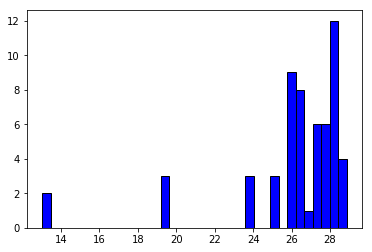

In [30]:
plt.hist(lower_third[:,keys['y']], color='blue', edgecolor='black', bins=36)

(array([  6.,  14.,  22.,  20.,  23.,  25.,  38.,  69., 113., 144., 185.,
        158., 103., 167., 207., 188., 115.,  77., 141., 102.,  87.,  81.,
         64.,  44.,  42.,  54.,  38.,  33.,  37.,  18.,  19.,  25.,  26.,
          8.,   8.,  10.]),
 array([-17.10300488, -15.53743542, -13.97186596, -12.4062965 ,
        -10.84072703,  -9.27515757,  -7.70958811,  -6.14401865,
         -4.57844918,  -3.01287972,  -1.44731026,   0.1182592 ,
          1.68382866,   3.24939813,   4.81496759,   6.38053705,
          7.94610651,   9.51167597,  11.07724544,  12.6428149 ,
         14.20838436,  15.77395382,  17.33952329,  18.90509275,
         20.47066221,  22.03623167,  23.60180113,  25.1673706 ,
         26.73294006,  28.29850952,  29.86407898,  31.42964845,
         32.99521791,  34.56078737,  36.12635683,  37.69192629,
         39.25749576]),
 <a list of 36 Patch objects>)

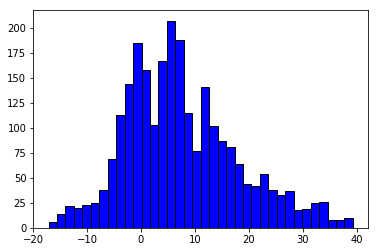

In [31]:
plt.hist(middle_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

(array([ 10.,  18.,  23.,  39.,  52.,  45.,  41.,  40.,  17.,  17.,  25.,
         17.,  39.,  57., 103.,  81.,  52.,  52.,  73.,  62.,  83.,  29.,
         27.,  30.,  99.,  41.,  79.,  68.,  50.,  15.,  31.,  29.,  25.,
         19.,  25.,  11.]),
 array([-20.02643514, -18.64861618, -17.27079722, -15.89297825,
        -14.51515929, -13.13734032, -11.75952136, -10.3817024 ,
         -9.00388343,  -7.62606447,  -6.2482455 ,  -4.87042654,
         -3.49260758,  -2.11478861,  -0.73696965,   0.64084932,
          2.01866828,   3.39648724,   4.77430621,   6.15212517,
          7.52994414,   8.9077631 ,  10.28558206,  11.66340103,
         13.04121999,  14.41903896,  15.79685792,  17.17467688,
         18.55249585,  19.93031481,  21.30813378,  22.68595274,
         24.0637717 ,  25.44159067,  26.81940963,  28.1972286 ,
         29.57504756]),
 <a list of 36 Patch objects>)

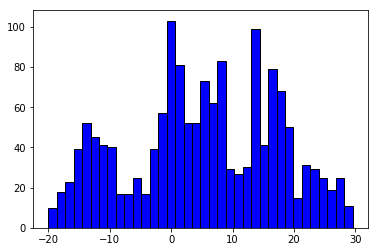

In [32]:
plt.hist(upper_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

In [33]:
# Problem with these graphs is that they weight all nodes equally, regardless of size and mass
# Create metric that calculates biomass for each thing, then adds that many of itself to distribution.

weighted_ps = []

In [34]:
vertices.shape[0]/2

2045.0

In [35]:
ps = zip(points[::2], points[1::2])

In [36]:
points[30]

(-2.4257303483886745,
 28.96947838698634,
 -5.811554163929252,
 0.11529601999999994,
 48.57778531500887,
 313.2612336390761,
 50.68518871966221,
 0.8464742464958716,
 1.0)

In [37]:
weights = np.array([Analyser.volumeOfConic(r1,r2,l) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps])

NameError: name 'Analyser' is not defined

In [38]:
weights.sum()

NameError: name 'weights' is not defined

In [39]:
log_weights = [(Analyser.volumeOfConic(r1,r2,l)) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps]

NameError: name 'Analyser' is not defined

In [40]:
plt.hist(log_weights, color='black', edgecolor='black', bins=36)

NameError: name 'log_weights' is not defined

In [41]:
n = weights.shape[0]
n

NameError: name 'weights' is not defined

In [42]:
import math

In [43]:
points[34]

(-1.0258149377724943,
 26.40806358229713,
 -2.293739827168634,
 0.3361399999999999,
 61.79312244044353,
 245.2778592991387,
 0.0,
 2.667371147536429,
 0.0)

In [44]:
for i in range(n):
    for j in range(math.floor(math.log(weights[i]))):
        weighted_ps.append(points[2*i])

NameError: name 'weights' is not defined

In [45]:
weighted_ps = np.array(weighted_ps)
weighted_ps.shape
weighted_ps[3]

IndexError: index 3 is out of bounds for axis 0 with size 0

In [46]:
plt.hist(weighted_ps[:, keys['parent angle']], bins=36)

IndexError: too many indices for array

In [47]:
degrees = weighted_ps[:,keys['horizontal orientation']]
radians = np.deg2rad(degrees)

bin_size = 5
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()
plt.savefig("metrics_vo.png")

IndexError: too many indices for array

In [48]:
leaves = vertices[vertices[:, 8] == 1]

In [49]:
vertices.shape

(4090, 9)

In [50]:
leaves.shape

(2048, 9)

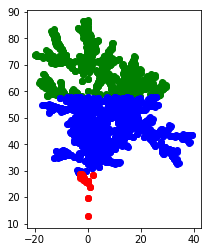

<Figure size 432x288 with 0 Axes>

In [51]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(upper_third[:,0], upper_third[:,1], color='green')
plt.scatter(middle_third[:,0], middle_third[:,1], color='blue')
plt.scatter(lower_third[:,0], lower_third[:,1], color='red')
plt.show()
plt.savefig('z.png')

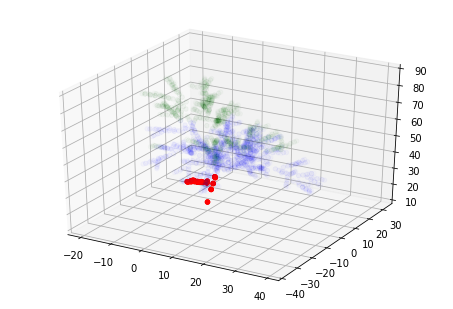

In [52]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = middle_third[:,0]
sequence_containing_y_vals = middle_third[:,2]
sequence_containing_z_vals = middle_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='blue', alpha=0.01)

sequence_containing_x_vals = upper_third[:,0]
sequence_containing_y_vals = upper_third[:,2]
sequence_containing_z_vals = upper_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='green', alpha=0.01)

sequence_containing_x_vals = lower_third[:,0]
sequence_containing_y_vals = lower_third[:,2]
sequence_containing_z_vals = lower_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='red', alpha=1)

pyplot.show()